## Some yt-xarray example usages

example 01 : create a slice plot using the `yt` convenience methods at the  `ds.yt` accessor.

yt_xarray : [INFO ] 2024-05-03 20:28:21,640:  Inferred geometry type is geodetic. To override, use ds.yt.set_geometry
yt_xarray : [INFO ] 2024-05-03 20:28:21,754:  Attempting to detect if yt_xarray will require field interpolation:
yt_xarray : [INFO ] 2024-05-03 20:28:21,755:      stretched grid detected: yt_xarray will interpolate.
yt : [INFO     ] 2024-05-03 20:28:21,838 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-05-03 20:28:21,839 Parameters: domain_dimensions         = [ 41 360 575]
yt : [INFO     ] 2024-05-03 20:28:21,839 Parameters: domain_left_edge          = [ 1.00000001e-01 -9.00000000e+01 -1.80000000e+02]
yt : [INFO     ] 2024-05-03 20:28:21,840 Parameters: domain_right_edge         = [1000.      90.     179.375]
yt : [INFO     ] 2024-05-03 20:28:21,840 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-05-03 20:28:22,193 xlim = -179.687500 179.687500
yt : [INFO     ] 2024-05-03 20:28:22,194 ylim = -90.000000 90.000000
yt : [INFO     ] 2024


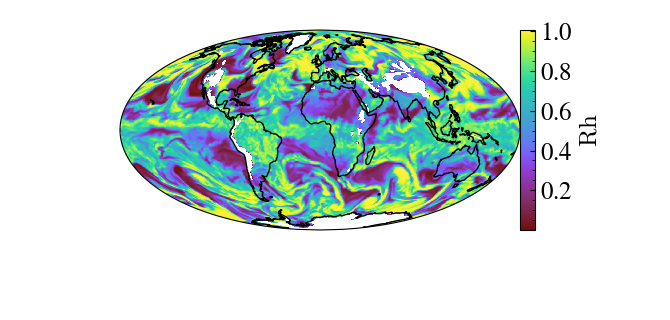

yt : [INFO     ] 2024-05-03 20:28:23,666 Saving plot slice_images/merra2_from_yt_convenience_800_hpa.png


['slice_images/merra2_from_yt_convenience_800_hpa.png']

In [1]:
import yt_xarray
import numpy as np 
import yt
import cartopy.feature as cfeature

dsx = yt_xarray.open_dataset("sample_nc/MERRA2_100.inst3_3d_asm_Np.19800120.nc4")

dsx0 = dsx.isel({'time':0})
slc = dsx0.yt.SlicePlot('altitude', 'RH', 
                        window_size=(4,2),
                        center=(800, 0.,0.))
slc.set_log('RH', False)
slc.render()
slc.plots['RH'].axes.add_feature(cfeature.COASTLINE)
slc.show()
slc.save('slice_images/merra2_from_yt_convenience_800_hpa.png')

example 02: create a PhasePlot using yt convenience functions. A PhasePlot is a 2D binned statistic. In this instance, the x and y bins are relative humidity and temperature respectively and the binned field is an array of ones that is added to the xarray dataset. By setting `weight_field=None`, bin values will be summed (you can alternatively provide a field here to weight the summation) and by setting `fractional=True`, the bin values will be normalized, resulting in a probability distribution of the x and y bins:

yt_xarray : [INFO ] 2024-05-03 20:28:23,732:  Attempting to detect if yt_xarray will require field interpolation:
yt_xarray : [INFO ] 2024-05-03 20:28:23,733:      stretched grid detected: yt_xarray will interpolate.
yt : [INFO     ] 2024-05-03 20:28:23,754 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-05-03 20:28:23,755 Parameters: domain_dimensions         = [ 41 360 575]
yt : [INFO     ] 2024-05-03 20:28:23,755 Parameters: domain_left_edge          = [ 1.00000001e-01 -9.00000000e+01 -1.80000000e+02]
yt : [INFO     ] 2024-05-03 20:28:23,755 Parameters: domain_right_edge         = [1000.      90.     179.375]
yt : [INFO     ] 2024-05-03 20:28:23,756 Parameters: cosmological_simulation   = 0



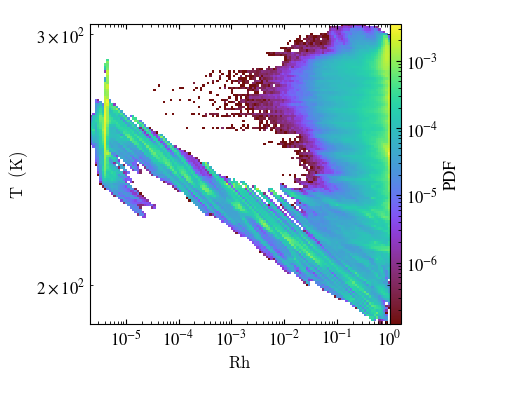

yt : [INFO     ] 2024-05-03 20:28:26,283 Saving plot slice_images/merra2_phase_plot.png


['slice_images/merra2_phase_plot.png']

In [2]:
import xarray as xr
ones_da = xr.DataArray(np.ones(dsx0.RH.shape), dims=dsx0.RH.dims)
dsx0['ones_field'] = ones_da

pp = dsx0.yt.PhasePlot('RH', 'T', 'ones_field', weight_field=None, fractional=True, figure_size=(3,3))
pp.set_colorbar_label('ones_field','PDF')
pp.set_font_size(12)
pp.show()
pp.save('slice_images/merra2_phase_plot.png')

example 03: subselect from the xarray dataset then load a `yt` dataset off that subselection

yt_xarray : [INFO ] 2024-05-03 20:28:26,370:  Inferred geometry type is geodetic. To override, use ds.yt.set_geometry
yt_xarray : [INFO ] 2024-05-03 20:28:26,370:  Attempting to detect if yt_xarray will require field interpolation:
yt_xarray : [INFO ] 2024-05-03 20:28:26,370:      stretched grid detected: yt_xarray will interpolate.
yt : [INFO     ] 2024-05-03 20:28:26,391 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-05-03 20:28:26,391 Parameters: domain_dimensions         = [41 80 64]
yt : [INFO     ] 2024-05-03 20:28:26,392 Parameters: domain_left_edge          = [ 1.00000001e-01  1.50000000e+01 -1.50000000e+02]
yt : [INFO     ] 2024-05-03 20:28:26,392 Parameters: domain_right_edge         = [1000.   55. -110.]
yt : [INFO     ] 2024-05-03 20:28:26,392 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-05-03 20:28:26,431 xlim = -150.000000 -110.000000
yt : [INFO     ] 2024-05-03 20:28:26,431 ylim = 15.000000 55.000000
yt : [INFO     ] 2024-05-03 20:28


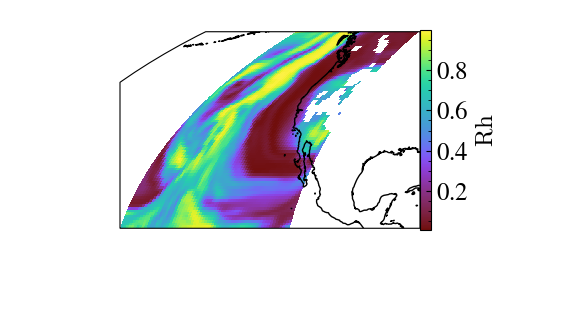

yt : [INFO     ] 2024-05-03 20:28:27,460 Saving plot slice_images/merra2_subset_from_load_grid_800hpa.png


['slice_images/merra2_subset_from_load_grid_800hpa.png']

In [3]:
lat_rng = [15., 55.]
lon_rng = [-150., -110.]

lat_vals = dsx0.lat.where(np.logical_and(dsx0.lat >= lat_rng[0], 
                                         dsx0.lat <= lat_rng[1]), 
                          drop=True)
lon_vals = dsx0.lon.where(np.logical_and(dsx0.lon >= lon_rng[0], 
                                         dsx0.lon <= lon_rng[1]), 
                          drop=True)

ds_sub_region = dsx0.sel({'lat': lat_vals, 'lon': lon_vals})


ds_yt = ds_sub_region.yt.load_grid(fields=['RH'])

c = ds_yt.domain_center.copy()
c[0] = 800

slc = yt.SlicePlot(ds_yt, 'altitude', 'RH', center=c, window_size=(3,2))
slc.set_log('RH', False)
slc.render()
slc.plots['RH'].axes.add_feature(cfeature.COASTLINE)
slc.show()
slc.save('slice_images/merra2_subset_from_load_grid_800hpa.png')

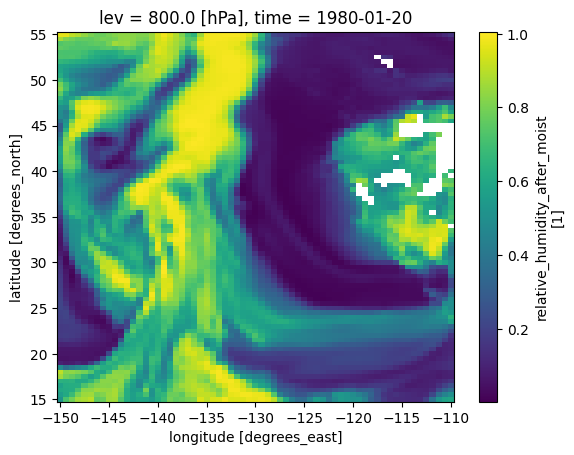

In [4]:
ds_sub_region.sel({'lev':800}).RH.plot()